In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Chocolatina's album problem"

How many sheets on average should an agent buy to fill its album?

In [2]:
r = [rg.get_int() for i in range(20000)]
plt.hist(r)
print(min(r))
print(max(r))

NameError: name 'rg' is not defined

In [ ]:
rg = RandomGenerator('exponential', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

## Data analysis

In [ ]:
df = pd.read_csv("data/data.csv")
df.head()

In [ ]:
exp = df[df['distribution'] == 'exponential']
uni = df[df['distribution'] == 'uniform']

In [ ]:
exp.describe()

In [ ]:
uni.describe()

In [ ]:
plt.scatter(exp['agents'], exp['time'])
plt.scatter(uni['agents'], uni['time'])

In [ ]:
agents = df['agents'].unique()
distributions = df['distribution'].unique()
sheets = df['sheets'].unique()

In [ ]:
agg = df[["time", "surplus", "agents", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets'])
final = agg.mean()
final

In [225]:
data = pd.read_csv('data/custom_distribution.csv')
data.loc[-1] = (-1, 0)
data = data.sort_values('sheet').reset_index()
data.drop('index', axis=1, inplace=True)
data['sheet'] = list(data.index)
data['distribution'] = data['distribution'].cumsum()

if (1 - data["distribution"].iloc[-1]) > 1e-10:
    raise Exception("The sum of probabilities must be 0")
random_args = [data]
print(data)

    sheet  distribution
0       0           0.0
1       1           0.1
2       2           0.2
3       3           0.3
4       4           0.4
5       5           0.5
6       6           0.6
7       7           0.7
8       8           0.8
9       9           0.9
10     10           1.0


In [226]:
def __custom_random(data):
    n = np.random.uniform()
    low = 0
    top = len(data) - 1
    while top - low > 1:
        middle = low + (top - low) // 2
        if n > data.loc[middle]['distribution']:
            low = middle
        elif n < data.loc[middle]['distribution']:
            top = middle
    return data.loc[low + (top - low) // 2]["sheet"]

In [227]:
rg = __custom_random

In [228]:
rg(*random_args)

2.0

(array([21., 16., 13., 23., 20., 29., 25., 17., 20., 16.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

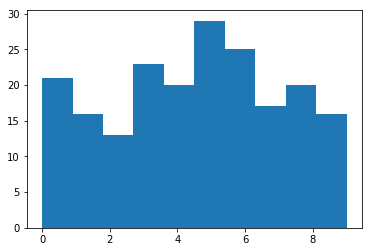

In [229]:
a = [rg(*random_args) for i in range(200)]
plt.hist(a)
#print(a)

In [66]:
test = [i/10 + 0.05  for i in range(10)]

In [221]:
def __custom_random(data, test, pos):
    n = test[pos]
    low = 0
    top = len(data) - 1
    print(n)
    middle = low + (top - low) // 2
    while top - low > 1:
        middle = low + (top - low) // 2
        print(low, middle, top)
        if n > data.loc[middle]['distribution']:
            low = middle
        elif n < data.loc[middle]['distribution']:
            top = middle
        else:
            break
    return data.loc[low + (top - low) // 2]["sheet"]

In [223]:
print(data)
__custom_random(data, test, 0)

    sheet  distribution
0       0           0.0
1       1           0.1
2       2           0.2
3       3           0.3
4       4           0.4
5       5           0.5
6       6           0.6
7       7           0.7
8       8           0.8
9       9           0.9
10     10           1.0
0.05
0 5 10
0 2 5
0 1 2


0.0

0.05
0 5 10
0 2 5
0 1 2
0.15000000000000002
0 5 10
0 2 5
0 1 2
0.25
0 5 10
0 2 5
2 3 5
0.35
0 5 10
0 2 5
2 3 5
3 4 5
0.45
0 5 10
0 2 5
2 3 5
3 4 5
0.55
0 5 10
5 7 10
5 6 7
0.65
0 5 10
5 7 10
5 6 7
0.75
0 5 10
5 7 10
7 8 10
0.8500000000000001
0 5 10
5 7 10
7 8 10
8 9 10
0.9500000000000001
0 5 10
5 7 10
7 8 10
8 9 10
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


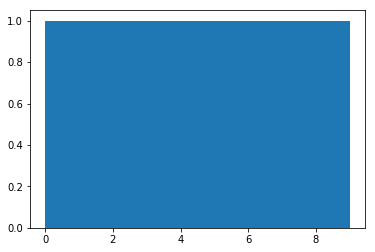

In [224]:
a = [__custom_random(data, test, i) for i in range(10)]
plt.hist(a)
print(a)